In [322]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.preprocessing import normalize
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import sklearn
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.chdir('../data/')

In [11]:
title = ['id','class','mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness',
         'mean_compactness','mean_concavity','mean_concavepoints','mean_symmetry','mean_fracdimen',
         'error_radius','error_texture','error_perimeter','error_area','error_smoothness',
         'error_compactness','error_concavity','error_concavepoints','error_symmetry','error_fracdimen',
         'large_radius','large_texture','large_perimeter','large_area','large_smoothness',
         'large_compactness','large_concavity',
         'large_concavepoints','large_symmetry','large_fracdimen']

In [12]:
df = pd.read_csv('wdbc.data', names=title)
df

id class  mean_radius  mean_texture  mean_perimeter  mean_area  \
0      842302     M        17.99         10.38          122.80     1001.0   
1      842517     M        20.57         17.77          132.90     1326.0   
2    84300903     M        19.69         21.25          130.00     1203.0   
3    84348301     M        11.42         20.38           77.58      386.1   
4    84358402     M        20.29         14.34          135.10     1297.0   
..        ...   ...          ...           ...             ...        ...   
564    926424     M        21.56         22.39          142.00     1479.0   
565    926682     M        20.13         28.25          131.20     1261.0   
566    926954     M        16.60         28.08          108.30      858.1   
567    927241     M        20.60         29.33          140.10     1265.0   
568     92751     B         7.76         24.54           47.92      181.0   

     mean_smoothness  mean_compactness  mean_concavity  mean_concavepoints  \
0            0.11840           0.27760         0.30010             0.14710   
1            0.08474           0.07864         0.08690             0.07017   
2            0.10960           0.15990         0.19740             0.12790   
3            0.14250           0.28390         0.24140             0.10520   
4            0.10030           0.13280         0.19800             0.10430   
..               ...               ...             ...                 ...   
564          0.11100           0.11590         0.24390             0.13890   
565          0.09780           0.10340         0.14400             0.09791   
566          0.08455           0.10230         0.09251             0.05302   
567          0.11780           0.27700         0.35140             0.15200   
568          0.05263           0.04362         0.00000             0.00000   

     ...  large_radius  large_texture  large_perimeter  large_area  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     large_smoothness  large_compactness  large_concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     large_concavepoints  large_symmetry  large_fracdimen  
0                 0.2654          0.4601          0.11890  
1                 0.1860          0.2750          0.08902  
2                 0.2430          0.3613          0.08758  
3                 0.2575          0.6638          0.17300  
4                 0.1625          0.2364          0.07678  
..                   ...             ...              ...  
564               0.2216          0.2060          0.07115  
565               0.1628          0.2572          0.06637  
566               0.1418          0

(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.


In [327]:
accu_train = []
accu_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
prec_train = []
prec_test = []
auc_train = []
auc_test = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    y_train = train[['class']]
    x_train = train.drop(['class', 'id'],axis=1)
    y_test = test[['class']]
    x_test = test.drop(['class', 'id'],axis=1)
    x_test.columns
    x_train_norm = pd.DataFrame(normalize(x_train), columns=x_train.columns)
    x_test_norm = pd.DataFrame(normalize(x_test), columns=x_test.columns)
    c_range = np.logspace(-3,6,10)
    param_grid = dict(C=c_range)
    grid = GridSearchCV(LinearSVC(penalty='l1', 
                       loss='squared_hinge', dual=False), param_grid=param_grid, cv=KFold(n_splits=5))
    grid.fit(x_train_norm,y_train)
    y_train_pred = grid.predict(x_train_norm)
    y_test_pred = grid.predict(x_test_norm)

    accu_train.append(accuracy_score(y_train,y_train_pred))
    accu_test.append(accuracy_score(y_test,y_test_pred))

    rec_train.append(recall_score(y_train,y_train_pred,pos_label='B'))
    rec_test.append(recall_score(y_test,y_test_pred,pos_label='B'))

    f1_train.append(f1_score(y_train,y_train_pred,pos_label='B'))
    f1_test.append(f1_score(y_test,y_test_pred,pos_label='B'))

    prec_train.append(precision_score(y_train,y_train_pred, pos_label='B'))
    prec_test.append(precision_score(y_test,y_test_pred,pos_label='B'))

    ds_train = grid.decision_function(x_train_norm)  #convert to numerical
    auc_train.append(roc_auc_score(y_train,ds_train))
    ds_test = grid.decision_function(x_test_norm)
    auc_test.append(roc_auc_score(y_test,ds_test))

In [328]:
print("Mean of accuracy train is: " )
print(np.mean(accu_train))
print("Mean of accuracy test is: " )
print(np.mean(accu_test))
print("Mean of recall score train is: " )
print(np.mean(rec_train))
print("Mean of recall score test is: " )
print(np.mean(rec_test))
print("Mean of f1 score train is: " )
print(np.mean(f1_train))
print("Mean of f1 score test is: " )
print(np.mean(f1_test))
print("Mean of precision score train is: " )
print(np.mean(prec_train))
print("Mean of precision score test is: " )
print(np.mean(prec_test))
print("Mean of auc train is: " )
print(np.mean(auc_train))
print("Mean of auc test is: " )
print(np.mean(auc_test))

Mean of accuracy train is: 
0.986111111111111
Mean of accuracy test is: 
0.957227138643068
Mean of recall score train is: 
0.9932400932400933
Mean of recall score test is: 
0.9694835680751175
Mean of f1 score train is: 
0.9889808060853073
Mean of f1 score test is: 
0.9661480326023537
Mean of precision score train is: 
0.9847687619574798
Mean of precision score test is: 
0.9632846215778107
Mean of auc train is: 
0.9988962018373784
Mean of auc test is: 
0.9910350994858039


In [329]:
confusion_matrix(y_train,y_train_pred)

array([[284,   2],
       [  7, 163]])

train set ROC AUC: 0.976


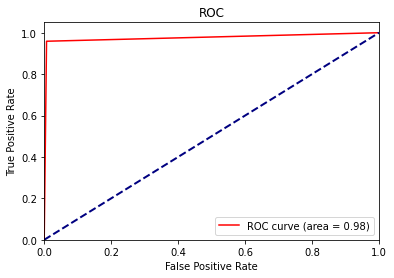

In [330]:
#bilb = sklearn.preprocessing.LabelBinarizer()
#y_train_new = bilb.fit_transform(y_train_2)
#y_train_pred_new = bilb.fit_transform(y_train_pred_2)

y_new = sklearn.preprocessing.label_binarize(y_train, classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(y_train_pred, classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [331]:
confusion_matrix(y_test,y_test_pred)

array([[70,  1],
       [ 1, 41]])

test set ROC AUC: 0.981


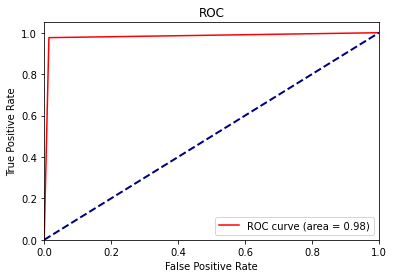

In [332]:
y_new = sklearn.preprocessing.label_binarize(y_test, classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(y_test_pred, classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('test set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

(b) ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [333]:
accu_train = []
accu_test = []
rec_train = []
rec_test = []
f1_train = []
f1_test = []
prec_train = []
prec_test = []
auc_train = []
auc_test = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    y_test = test[['class']]
    x_test = test.drop(['class','id'],axis=1)
    #y_train = train[['class']]
    #train = train.drop(['id'],axis=1)
    
    train_label = pd.DataFrame()
    train_l1 = train[df['class']=='B'].sample(frac=0.5)
    train_l2 = train[df['class']=='M'].sample(frac=0.5)
    train_label = pd.concat([train_l1, train_l2], names=title)
    
    train_unlabel = train[~train.index.isin(train_label.index)]
    train_unlabel.drop(['class', 'id'],axis=1,inplace=True)
    
    train_label = train_label.drop(['id'],axis=1)
    
    while len(train_unlabel) > 0:
        y_train_label = train_label[['class']]
        x_train_label = train_label.drop(["class"],axis=1)
        label_norm = pd.DataFrame(normalize(x_train_label), columns=x_train_label.columns)
        c_range = np.logspace(-3,6,10)
        param_grid = dict(C=c_range)
        grid = GridSearchCV(LinearSVC(penalty='l1', 
                       loss='squared_hinge', dual=False), param_grid=param_grid, cv=KFold(n_splits=5))
        grid.fit(label_norm,y_train_label)
        dist_y = abs(grid.decision_function(train_unlabel))
        max_y = np.argsort(dist_y)
        un_label = train_unlabel.iloc[max_y[::-1]]
        un_pred = grid.predict(un_label)
        new_un_label = pd.DataFrame()
        new_un_label['class'] = un_pred[0]
        train_label = pd.concat([train_label, new_un_label])
        train_unlabel = train_unlabel[~train_unlabel.index.isin(un_label.index)]
        
    y_train_label = train_label[['class']]
    x_train_label = train_label.drop(['class'], axis=1)
    
    x_train_label_norm = pd.DataFrame(normalize(x_train_label), columns=x_train_label.columns)
    x_test_norm = pd.DataFrame(normalize(x_test), columns=x_test.columns)
    
    c_range = np.logspace(-3,6,10)
    param_grid = dict(C=c_range)
    grid = GridSearchCV(LinearSVC(penalty='l1', 
                       loss='squared_hinge', dual=False), param_grid=param_grid, cv=KFold(n_splits=5))
    grid.fit(x_train_label_norm,y_train_label)
    y_train_pred = grid.predict(x_train_label_norm)
    y_test_pred = grid.predict(x_test_norm)

    accu_train.append(accuracy_score(y_train_label,y_train_pred))
    accu_test.append(accuracy_score(y_test,y_test_pred))

    rec_train.append(recall_score(y_train_label,y_train_pred,pos_label='B'))
    rec_test.append(recall_score(y_test,y_test_pred,pos_label='B'))

    f1_train.append(f1_score(y_train_label,y_train_pred,pos_label='B'))
    f1_test.append(f1_score(y_test,y_test_pred,pos_label='B'))

    prec_train.append(precision_score(y_train_label,y_train_pred, pos_label='B'))
    prec_test.append(precision_score(y_test,y_test_pred,pos_label='B'))

    ds_train = grid.decision_function(x_train_label_norm)  #convert to numerical
    ds_test = grid.decision_function(x_test_norm)
    auc_train.append(roc_auc_score(y_train_label,ds_train))
    auc_test.append(roc_auc_score(y_test,ds_test))

In [334]:
print("Mean of accuracy train is: " )
print(np.mean(accu_train))
print("Mean of accuracy test is: " )
print(np.mean(accu_test))
print("Mean of recall score train is: " )
print(np.mean(rec_train))
print("Mean of recall score test is: " )
print(np.mean(rec_test))
print("Mean of f1 score train is: " )
print(np.mean(f1_train))
print("Mean of f1 score test is: " )
print(np.mean(f1_test))
print("Mean of precision score train is: " )
print(np.mean(prec_train))
print("Mean of precision score test is: " )
print(np.mean(prec_test))
print("Mean of auc train is: " )
print(np.mean(auc_train))
print("Mean of auc test is: " )
print(np.mean(auc_test))

Mean of accuracy train is: 
0.988157894736842
Mean of accuracy test is: 
0.9584070796460177
Mean of recall score train is: 
0.9954981540285165
Mean of recall score test is: 
0.9713615023474179
Mean of f1 score train is: 
0.9907823098398172
Mean of f1 score test is: 
0.9670952811518823
Mean of precision score train is: 
0.986163972509226
Mean of precision score test is: 
0.9635123931962842
Mean of auc train is: 
0.9984815198111548
Mean of auc test is: 
0.9893248379163873


In [335]:
confusion_matrix(y_train_label,y_train_pred)

array([[160,   0],
       [  1,  67]])

train set ROC AUC: 0.993


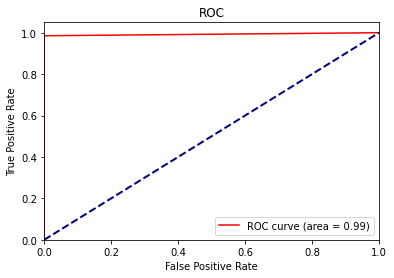

In [336]:
y_new = sklearn.preprocessing.label_binarize(y_train_label, classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(y_train_pred, classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [337]:
confusion_matrix(y_test,y_test_pred)

array([[71,  0],
       [ 3, 39]])

train set ROC AUC: 0.964


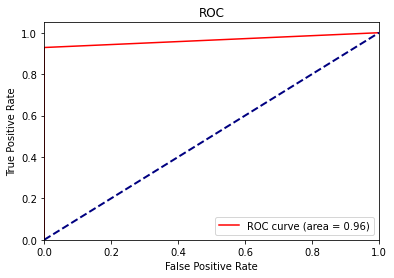

In [338]:
y_new = sklearn.preprocessing.label_binarize(y_test, classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(y_test_pred, classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

(b) iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.


A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [339]:
accu_train = []
rec_train = []
f1_train = []
prec_train = []
auc_train = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    train_class = train.drop(['id'], axis=1)
    train_new = train.drop(['class', 'id'],axis=1)
    kmean = KMeans(n_clusters=2, random_state=a)
    clu_pred = kmean.fit_predict(train_new)
    
    clu_0 = train_new[clu_pred == 0]
    clu_1 = train_new[clu_pred == 1]
    
    clu_point_0 = []
    clu_point_1 = []
    for b in range(1,31,1):
        min_0 = pairwise_distances_argmin(kmean.cluster_centers_, np.array(clu_0))
        clu_point_0.append(min_0[0])
        clu_0 = clu_0.drop(clu_0.index[min_0[0]])
        
        min_1 = pairwise_distances_argmin(kmean.cluster_centers_, np.array(clu_1))
        clu_point_1.append(min_1[1])
        clu_1 = clu_1.drop(clu_1.index[min_1[1]])
#print(clu_point_0)
#print(clu_point_1)
#for c in range(0,30):
    clu_0_point_class = train_class.loc[clu_point_0]
    clu_1_point_class = train_class.loc[clu_point_1]
    clu_0_data = train_new.loc[clu_point_0]
    clu_1_data = train_new.loc[clu_point_1]
    clu_0_new = pd.concat([clu_0,clu_0_data],axis=0)
    clu_1_new = pd.concat([clu_1,clu_1_data],axis=0)
    num_clu_0 = clu_0_point_class['class'].value_counts().keys()[0]
    num_clu_1 = clu_1_point_class['class'].value_counts().keys()[0]
    clu_0_new['class'] = len(clu_0_new)*[num_clu_0]
    clu_1_new['class'] = len(clu_1_new)*[num_clu_1]
    new_train = pd.concat([clu_0_new,clu_1_new])
    
    accu_train.append(accuracy_score(train_class['class'],new_train['class']))
    rec_train.append(recall_score(train_class['class'],new_train['class'],pos_label='B'))
    f1_train.append(f1_score(train_class['class'],new_train['class'],pos_label='B'))
    prec_train.append(precision_score(train_class['class'],new_train['class'], pos_label='B'))
    
    y_train = sklearn.preprocessing.label_binarize(new_train["class"], classes=['B','M'])
    y_train_pred = sklearn.preprocessing.label_binarize(train_class["class"], classes=['B','M'])
    #ds_train = grid.decision_function(x_train_label_norm)  #convert to numerical
    auc_train.append(auc(y_train,y_train_pred))

In [340]:
print("Mean of accuracy train is: " )
print(np.mean(accu_train))
print("Mean of recall score train is: " )
print(np.mean(rec_train))
print("Mean of f1 score train is: " )
print(np.mean(f1_train))
print("Mean of precision score train is: " )
print(np.mean(prec_train))
print("Mean of auc train is: " )
print(np.mean(auc_train))

Mean of accuracy train is: 
0.5724415204678361
Mean of recall score train is: 
0.7364801864801864
Mean of f1 score train is: 
0.6396165885106734
Mean of precision score train is: 
0.577196121492172
Mean of auc train is: 
0.25


In [341]:
confusion_matrix(train_class['class'], new_train['class'])

array([[246,  40],
       [113,  57]])

train set ROC AUC: 0.598


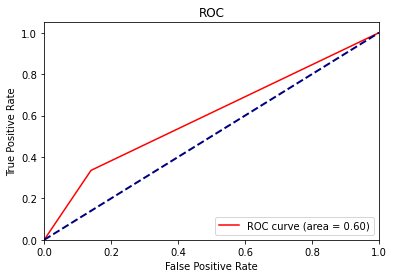

In [342]:
y_new = sklearn.preprocessing.label_binarize(train_class['class'], classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(new_train['class'], classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [343]:
accu_test = []
rec_test = []
f1_test = []
prec_test = []
auc_test = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    test_class = test.drop(['id'], axis=1)
    test_new = test.drop(['class', 'id'],axis=1)
    kmean2 = KMeans(n_clusters=2, random_state=a)
    clu_pred = kmean2.fit_predict(test_new)
    
    clu_0 = test_new[clu_pred == 0]
    clu_1 = test_new[clu_pred == 1]
    
    clu_0_min = pairwise_distances_argmin(kmean2.cluster_centers_, np.array(clu_0))[0]
        
    clu_1_min = pairwise_distances_argmin(kmean2.cluster_centers_, np.array(clu_1))[1]
    
#print(clu_point_0)
#print(clu_point_1)
#for c in range(0,30):
    clu_0_data = test_class.loc[clu_0_min]
    clu_1_data = test_class.loc[clu_1_min]

    num_clu_0 = clu_0_data['class'][0]
    num_clu_1 = clu_1_data['class'][0]
    clu_0['class'] = len(clu_0)*[num_clu_0]
    clu_1['class'] = len(clu_1)*[num_clu_1]
    new_test = pd.concat([clu_0,clu_1])
    
    accu_test.append(accuracy_score(test_class['class'],new_test['class']))
    rec_test.append(recall_score(test_class['class'],new_test['class'],pos_label='B'))
    f1_test.append(f1_score(test_class['class'],new_test['class'],pos_label='B'))
    prec_test.append(precision_score(test_class['class'],new_test['class'], pos_label='B'))
    
    y_test = sklearn.preprocessing.label_binarize(new_test["class"], classes=['B','M'])
    y_test_pred = sklearn.preprocessing.label_binarize(test_class["class"], classes=['B','M'])
    #ds_train = grid.decision_function(x_train_label_norm)  #convert to numerical
    auc_test.append(auc(y_test,y_test_pred))

In [344]:
print("Mean of accuracy test is: " )
print(np.mean(accu_test))
print("Mean of recall score test is: " )
print(np.mean(rec_test))
print("Mean of f1 score test is: " )
print(np.mean(f1_test))
print("Mean of precision score test is: " )
print(np.mean(prec_test))
print("Mean of auc test is: " )
print(np.mean(auc_test))

Mean of accuracy test is: 
0.6283185840707967
Mean of recall score test is: 
1.0
Mean of f1 score test is: 
0.7717391304347824
Mean of precision score test is: 
0.6283185840707967
Mean of auc test is: 
0.0


In [345]:
confusion_matrix(test_class["class"], new_test["class"])

array([[71,  0],
       [42,  0]])

train set ROC AUC: 0.500


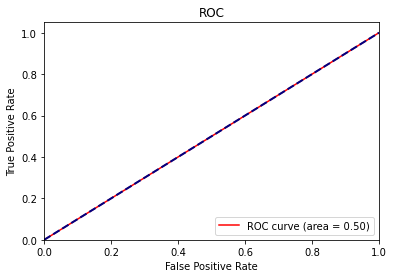

In [346]:
y_new = sklearn.preprocessing.label_binarize(test_class['class'], classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(new_test['class'], classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [347]:
from sklearn import neighbors
accu_train = []
rec_train = []
f1_train = []
prec_train = []
auc_train = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    train_class = train.drop(['id'], axis=1)
    train_new = train.drop(['class', 'id'],axis=1)
    train_new = pd.DataFrame(normalize(train_new), columns=train_new.columns)

    spec_clu = SpectralClustering(n_clusters= 2, affinity= 'rbf', gamma = 1.0, random_state= a)
    clu_pred = spec_clu.fit_predict(train_new)
    #print(clu_pred)
    #knn = neighbors.KNeighborsClassifier(1, weights='distance')
    #result = knn.fit(train_new,clu_pred)
    #knn.predict()
    #print(result)
    clu_0 = train_new[clu_pred == 0]
    clu_1 = train_new[clu_pred == 1]
    
    cen= []
    cen_0 = []
    for i in clu_0.columns:
        a = np.mean(clu_0[i])
        cen_0.append(a)
    cen_1 = []
    for j in clu_1.columns:
        b = np.mean(clu_1[j])
        cen_1.append(b)
    cen.append(cen_0)
    cen.append(cen_1)
    clu_point_0 = []
    clu_point_1 = []
    cen = np.array(cen)
    for b in range(1,31,1):
        if len(clu_0)>0:
            min_0 = pairwise_distances_argmin(cen, clu_0)
            clu_point_0.append(min_0[0])
            clu_0 = clu_0.drop(clu_0.index[min_0[0]])
        if len(clu_1)>0:
            min_1 = pairwise_distances_argmin(cen, clu_1)
            clu_point_1.append(min_1[1])
            clu_1 = clu_1.drop(clu_1.index[min_1[1]])
#print(clu_point_0)
#print(clu_point_1)
#for c in range(0,30):
    clu_0_class = train_class.loc[clu_point_0]
    clu_1_class = train_class.loc[clu_point_1]
    clu_0_data = train_new.loc[clu_point_0]
    clu_1_data = train_new.loc[clu_point_1]
    clu_0_new = pd.concat([clu_0,clu_0_data],axis=0)
    clu_1_new = pd.concat([clu_1,clu_1_data],axis=0)
    num_clu_0 = clu_0_class['class'].value_counts().keys()[0]
    num_clu_1 = clu_1_class['class'].value_counts().keys()[0]
    clu_0_new['class'] = len(clu_0_new)*[num_clu_0]
    clu_1_new['class'] = len(clu_1_new)*[num_clu_1]
    new_train = pd.concat([clu_0_new,clu_1_new])
    
    accu_train.append(accuracy_score(train_class['class'],new_train['class']))
    rec_train.append(recall_score(train_class['class'],new_train['class'],pos_label='B'))
    f1_train.append(f1_score(train_class['class'],new_train['class'],pos_label='B'))
    prec_train.append(precision_score(train_class['class'],new_train['class'], pos_label='B'))
    
    y_train = sklearn.preprocessing.label_binarize(new_train["class"], classes=['B','M'])
    y_train_pred = sklearn.preprocessing.label_binarize(train_class["class"], classes=['B','M'])
    #ds_train = grid.decision_function(x_train_label_norm)  #convert to numerical
    auc_train.append(auc(y_train,y_train_pred))

In [348]:
print("Mean of accuracy train is: " )
print(np.mean(accu_train))
print("Mean of recall score train is: " )
print(np.mean(rec_train))
print("Mean of f1 score train is: " )
print(np.mean(f1_train))
print("Mean of precision score train is: " )
print(np.mean(prec_train))
print("Mean of auc train is: " )
print(np.mean(auc_train))

Mean of accuracy train is: 
0.48567251461988303
Mean of recall score train is: 
0.40792540792540793
Mean of f1 score train is: 
0.38911476296932557
Mean of precision score train is: 
0.39343608869126706
Mean of auc train is: 
0.18333333333333332


In [349]:
confusion_matrix(train_class['class'],new_train['class'])

array([[225,  61],
       [106,  64]])

train set ROC AUC: 0.582


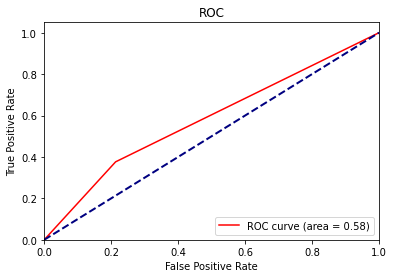

In [350]:
y_new = sklearn.preprocessing.label_binarize(train_class['class'], classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(new_train['class'], classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [351]:
accu_test = []
rec_test = []
f1_test = []
prec_test = []
auc_test = []
for a in range(1,31,1):
    test = pd.DataFrame()
    test_1 = df[df['class']=='B'].sample(frac=0.2)
    test_2 = df[df['class']=='M'].sample(frac=0.2)
    test = pd.concat([test_1, test_2], names=title)
    train = df[~df.index.isin(test.index)]
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    test_class = test.drop(['id'], axis=1)
    test_new = test.drop(['class', 'id'],axis=1)
    test_new = pd.DataFrame(normalize(test_new), columns=test_new.columns)
    spec_clu = SpectralClustering(n_clusters= 2, affinity= 'rbf', gamma = 1.0, random_state= a)
    clu_pred = spec_clu.fit_predict(test_new)
    #knn = neighbors.KNeighborsClassifier(1, weights='distance')
    #result = knn.fit(train_new,clu_pred)
    #knn.predict()
    #print(result)
    clu_0 = test_new[clu_pred == 0]
    clu_1 = test_new[clu_pred == 1]
    
    cen= []
    cen_0 = []
    for i in clu_0.columns:
        a = np.mean(clu_0[i])
        cen_0.append(a)
    cen_1 = []
    for j in clu_1.columns:
        b = np.mean(clu_1[j])
        cen_1.append(b)
    cen.append(cen_0)
    cen.append(cen_1)
    cen = np.array(cen)
    min_0 = pairwise_distances_argmin(cen, clu_0)[0]
    
    min_1 = pairwise_distances_argmin(cen, clu_1)[1]

    clu_0_data = test_class.loc[min_0]
    clu_1_data = test_class.loc[min_1]
    
    clu_0_new = clu_0_data['class'][0]
    clu_1_new = clu_1_data['class'][0]
    clu_0['class'] = len(clu_0)*[clu_0_new]
    clu_1['class'] = len(clu_1)*[clu_1_new]
    new_test = pd.concat([clu_0,clu_1])
    print(new_test)
    accu_test.append(accuracy_score(test_class['class'],new_test['class']))
    rec_test.append(recall_score(test_class['class'],new_test['class'],pos_label='B'))
    f1_test.append(f1_score(test_class['class'],new_test['class'],pos_label='B'))
    prec_test.append(precision_score(test_class['class'],new_test['class'], pos_label='B'))
    
    y_test = sklearn.preprocessing.label_binarize(new_test["class"], classes=['B','M'])
    y_test_pred = sklearn.preprocessing.label_binarize(test_class["class"], classes=['B','M'])
    #ds_train = grid.decision_function(x_train_label_norm)  #convert to numerical
    auc_test.append(auc(y_test,y_test_pred))

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
71      0.007852      0.007590        0.051297   0.470870         0.000043   
73      0.009483      0.010382        0.062147   0.540411         0.000049   
74      0.009367      0.010109        0.061842   0.572276         0.000052   
76      0.008960      0.014242        0.058332   0.488324         0.000052   
79      0.009344      0.013114        0.060903   0.585355         0.000045   
..           ...           ...             ...        ...              ...   
94      0.017418      0.029601        0.115230   0.568449         0.000191   
98      0.010840      0.012722        0.075290   0.601595         0.000074   
100     0.011196      0.011054        0.073132   0.600718         0.000065   
102     0.013776      0.020399        0.089808   0.652673         0.000082   
103     0.011022      0.013085        0.072670   0.661867         0.000057   

     mean_compactness  mean_concavity  mean_concavepoints  mean

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       0.014340      0.020293        0.091816   0.613554         0.000090   
1       0.014646      0.022767        0.096758   0.659609         0.000085   
2       0.013367      0.019716        0.086971   0.618599         0.000076   
3       0.015528      0.021102        0.099199   0.606490         0.000106   
4       0.017424      0.028639        0.113329   0.662730         0.000137   
..           ...           ...             ...        ...              ...   
108     0.009661      0.012831        0.063942   0.590159         0.000047   
109     0.009242      0.009848        0.060497   0.584620         0.000041   
110     0.009551      0.009050        0.062659   0.551685         0.000052   
111     0.012823      0.020770        0.084504   0.579814         0.000102   
112     0.012577      0.011691        0.084037   0.577521         0.000088   

     mean_compactness  mean_concavity  mean_concavepoints  mean

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       0.016224      0.020227        0.103741   0.608935         0.000115   
1       0.019094      0.022665        0.123568   0.651354         0.000197   
2       0.017126      0.020748        0.108652   0.651023         0.000120   
3       0.015771      0.023336        0.099832   0.637105         0.000097   
4       0.016620      0.024838        0.107342   0.598166         0.000152   
..           ...           ...             ...        ...              ...   
106     0.009242      0.009848        0.060497   0.584620         0.000041   
108     0.011137      0.014032        0.073260   0.539470         0.000079   
110     0.011145      0.012276        0.073136   0.604656         0.000057   
111     0.007280      0.008140        0.047773   0.463027         0.000036   
112     0.013613      0.022036        0.089598   0.582194         0.000119   

     mean_compactness  mean_concavity  mean_concavepoints  mean

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
41      0.017759      0.034479        0.112583   0.524332         0.000190   
48      0.013411      0.018562        0.085605   0.581669         0.000077   
55      0.015323      0.024507        0.098404   0.577592         0.000120   
62      0.013103      0.012308        0.084532   0.585904         0.000091   
71      0.008610      0.009831        0.056378   0.500936         0.000042   
..           ...           ...             ...        ...              ...   
103     0.013113      0.020315        0.088044   0.620296         0.000100   
105     0.012946      0.026044        0.087948   0.609768         0.000089   
106     0.013816      0.020476        0.089928   0.618475         0.000090   
109     0.010361      0.010032        0.068694   0.641758         0.000058   
112     0.014388      0.023392        0.095482   0.617087         0.000109   

     mean_compactness  mean_concavity  mean_concavepoints  mean

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0       0.014822      0.022449        0.094856   0.637442         0.000096   
1       0.016588      0.024292        0.105984   0.623285         0.000117   
2       0.017240      0.025695        0.109043   0.639153         0.000110   
3       0.020165      0.032111        0.129016   0.600438         0.000194   
4       0.015869      0.016395        0.102514   0.647416         0.000100   
..           ...           ...             ...        ...              ...   
105     0.009344      0.013114        0.060903   0.585355         0.000045   
106     0.008541      0.008870        0.056256   0.585933         0.000044   
110     0.014200      0.023834        0.095577   0.567784         0.000139   
111     0.006905      0.007128        0.045555   0.513117         0.000031   
112     0.011360      0.016479        0.072824   0.565713         0.000058   

     mean_compactness  mean_concavity  mean_concavepoints  mean

In [352]:
print("Mean of accuracy test is: " )
print(np.mean(accu_test))
print("Mean of recall score test is: " )
print(np.mean(rec_test))
print("Mean of f1 score test is: " )
print(np.mean(f1_test))
print("Mean of precision score test is: " )
print(np.mean(prec_test))
print("Mean of auc test is: " )
print(np.mean(auc_test))

Mean of accuracy test is: 
0.6283185840707967
Mean of recall score test is: 
1.0
Mean of f1 score test is: 
0.7717391304347824
Mean of precision score test is: 
0.6283185840707967
Mean of auc test is: 
0.0


In [353]:
confusion_matrix(test_class['class'],new_test['class'])

array([[71,  0],
       [42,  0]])

train set ROC AUC: 0.500


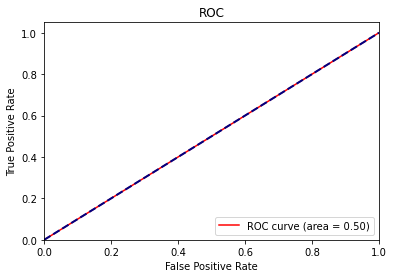

In [354]:
y_new = sklearn.preprocessing.label_binarize(test_class['class'], classes=['B', 'M'])
y_new_pred = sklearn.preprocessing.label_binarize(new_test['class'], classes=['B', 'M'])

fpr, tpr, threshold = roc_curve(y_new, y_new_pred)
r_ac = auc(fpr, tpr)
print('train set ROC AUC: %.3f' %r_ac)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' %r_ac)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


supervised learning of Mean of accuracy test is: 0.9654867256637168. semi-supervised learning of 
Mean of accuracy test is: 0.9572271386430677. Unspervised learning of Mean of accuracy test is: 0.613864306784661. 
We can see that supervised learning and semi-supervised learning both have high quality performance. 
and supervised learning perform the best.
Whereas unsupervised learning performance worse.

# 2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [303]:
name = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df_new = pd.read_csv('data_banknote_authentication.txt', names=name)
df_new

variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

In [355]:
test_1 = df_new.loc[df_new['class'] == 0].sample(n=236)
test_2 = df_new.loc[df_new['class'] == 1].sample(n=236)
test = pd.concat([test_1, test_2], names=name)
train = df_new[~df_new.index.isin(test.index)]
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
y_train = train[["class"]]
x_train = train.drop(["class"],axis=1)
y_test = test[["class"]]
x_test = test.drop(["class"],axis=1)

(b)Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Traina SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [356]:
c_range = np.logspace(-3,6,10)
param_grid = dict(C=c_range)
mc_error = {}
for a in range(1,51,1):
    new_train = train
    err = []
    update = pd.DataFrame()
    for b in range(1,91,1):
        sample = new_train.sample(n=10)
        update = pd.concat([update,sample])
        new_train = new_train[~new_train.index.isin(update.index)]
        y_train_loop = update['class']
        x_train_loop = update.drop(['class'], axis=1)
        grid = GridSearchCV(LinearSVC(penalty='l1', 
                       loss='squared_hinge', dual=False), param_grid=param_grid, cv=KFold(n_splits=5))
        grid.fit(x_train_loop, y_train_loop)
        x = grid.score(x_test, y_test)
        test_error = 1 - x
        err.append(test_error)
    mc_error[a-1] = err

In [357]:
x_test = pd.DataFrame(normalize(x_test), columns=x_test.columns)

ii.
selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.
Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [361]:
c_range = np.logspace(-3,6,10)
param_grid = dict(C=c_range)
mc_error_2 = {}
for a in range(1,51,1):
    new_train = train
    err = []
    update = pd.DataFrame()
    sample = new_train.sample(n=10)
    stand = np.array([0,1])
    x = pd.unique(sample['class'])
    while x.all() != stand.all():
        sample = new_train.sample(n=10)
        x = pd.unique(sample['class'])
    for b in range(1,91,1):
        update = pd.concat([update,sample])
        new_train = new_train[~new_train.index.isin(update.index)]
        y_train_loop = update['class']
        x_train_loop = update.drop(['class'], axis=1)
        #x_train_loop = x_train_loop.fillna(0)
        #y_train_loop = y_train_loop.fillna(0)
        grid = GridSearchCV(LinearSVC(penalty='l1', 
                        loss='squared_hinge', dual=False), param_grid=param_grid, cv=KFold(n_splits=5))
        grid.fit(x_train_loop, y_train_loop)
        
        x = grid.score(x_test, y_test)
        test_error = 1 - x
        err.append(test_error)

        new_train_2 = new_train.drop(['class'],axis=1)
        print(b)
        print(new_train)
        if b==89:
            continue
        dist_y = abs(grid.decision_function(new_train_2))
        min_y = np.argsort(dist_y)
        sample = new_train.iloc[min_y[:10]]
        #sample = pd.concat([update,large_point])
        new_train = new_train[~new_train.index.isin(sample.index)]
        
    mc_error_2[a-1] = err

1
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[890 rows x 5 columns]
2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

15
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[750 rows x 5 columns]
16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

29
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[610 rows x 5 columns]
30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

43
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[470 rows x 5 columns]
44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
819   -2.4458   1.62

57
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
594  -3.31250   0.10139   0.55323 -0.29570      1
803  -2.96620 -10.32570   8.78400 -2.11380      1
853  -2.16740   0.12415  -1.04650 -0.86208      1

[330 rows x 5 columns]
58
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
523   4.71140   2.07

71
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
10   -1.57680  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
511   4.15420   7.27560  -2.47660 -1.20990      0
514   4.98520   8.35160  -2.54250 -1.28230      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
524   0.01727   8.69300   1.39890 -3.96680      0

[190 rows x 5 columns]
72
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
10   -1.57680  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
511   4.15420   7.27

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.42370   2.92410  0.66119      1
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
817   -2.0662   0.16

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[720 rows x 5 columns]
19
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[580 rows x 5 columns]
33
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[440 rows x 5 columns]
47
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[300 rows x 5 columns]
61
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0008  -3.20490 -3.10950      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[160 rows x 5 columns]
75
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1
853  -2.16740   0.12415  -1.04650 -0.86208      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674 -2.458600 -1.46210      0
1      3.8660   -2.6383  1.924200  0.10645      0
2      3.4566    9.5228 -4.011200 -3.59440      0
3      3.5912    3.0129  0.728880  0.56421      0
4      2.0922   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632    8.7096 -0.216210 -3.63450      1
890   -4.0786    2.9239  0.870260 -0.65389      1
891   -2.5899   -0.3911  0.934520  0.42972      1
892   -1.5732    1.0636 -0.712320 -0.83880      1
893   -2.1668    1.5933  0.045122 -1.67800      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
819   -2.4458   1.62850  -0.88541 -1.48020      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
819   -2.4458   1.62

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
594  -3.31250   0.10139   0.55323 -0.29570      1
852  -3.59330   0.22968   0.71260 -0.33320      1
853  -2.16740   0.12415  -1.04650 -0.86208      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
498    4.8451    8.1

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038  -0.09540  0.56421      1
889  -6.16320    8.7096  -0.21621 -3.63450      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0
523    4.7114   2.07550  -0.27020  1.23790      0
803   -2.9662 -10.32570   8.78400 -2.11380      1
852   -3.5933   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960 -0.216210 -3.63450      1
890   -4.0786   2.92390  0.870260 -0.65389      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2446   6.55370 -0.12760      1
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
819   -2.4458   1.62850  -0.88541 -1.48020      1
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
817   -2.0662   0.16

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
10   -1.57680  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[880 rows x 5 columns]
3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674 -2.458600 -1.46210      0
1      3.8660   -2.6383  1.924200  0.10645      0
2      3.4566    9.5228 -4.011200 -3.59440      0
3      3.5912    3.0129  0.728880  0.56421      0
4      2.0922   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632    8.7096 -0.216210 -3.63450      1
890   -4.0786    2.9239  0.870260 -0.65389      1
891   -2.5899   -0.3911  0.934520  0.42972      1
892   -1.5732    1.0636 -0.712320 -0.83880      1
893   -2.1668    1.5933  0.045122 -1.67800      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[460 rows x 5 columns]
45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness   curtosis  entropy  class
0      4.5459   8.16740  -2.458600 -1.46210      0
1      3.8660  -2.63830   1.924200  0.10645      0
2      3.4566   9.52280  -4.011200 -3.59440      0
3      3.5912   3.01290   0.728880  0.56421      0
4      2.0922  -6.81000   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
893   -2.1668   1.59330   0.045122 -1.67800      1
894   -1.1667  -1.42370   2.924100  0.66119      1
895   -4.5046  -5.81260  10.886700 -0.52846      1
897   -1.3887  -4.87730   6.477400  0.34179      1
899   -2.5419  -0.65804   2.684200  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness   curtosis  entropy  class
0      4.5459   8.16740  -2.458600 -1.46210      0
1      3.8660  -2.63830   1.924200  0.10645      0
2      3.4566   9.52280  -4.011200 -3.59440      0
3      3.5912   3.01290   0.728880  0.56421      0
4      2.0922  -6.81000   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
893

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8183  -2.42600 -1.88620      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960  -0.21621 -3.63450      1
890   -4.0786   2.92390   0.87026 -0.65389      1
891   -2.5899  -0.39110   0.93452  0.42972      1
892   -1.5732   1.06360  -0.71232 -0.83880      1
899   -2.5419  -0.65804   2.68420  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.32670  1.455100      0
160    4.6464   10.5326  -4.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960 -0.216210 -3.63450      1
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2446   6.55370 -0.12760      1
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
858  -3.89530    4.0

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
817   -2.0662   0.16

60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1

[300 rows x 5 columns]
61
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
11     3.4040    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5565  -3.39170 -1.54740      0
505    2.8672   10.0008  -3.20490 -3.10950      0
511    4.1542    7.2756  -2.47660 -1.20990      0
514    4.9852    8.3516  -2.54250 -1.28230      0
519    2.2546    8.0992  -0.24877 -3.26980      0

[160 rows x 5 columns]
75
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
11     3.4040    8.7261  -2.99150 -0.57242      0
16     5.2423   11.0272  -4.35300 -4.10130      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
518   4.04220  -4.39100   4.74660  1.13700      0
519   2.25460   8.09920  -0.24877 -3.26980      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670   -1.4237   2.92410  0.66119      1
895  -4.50460   -5.8126  10.88670 -0.52846      1
896   0.40614    1.3492  -1.45010 -0.55949      1
897  -1.38870   -4.8773   6.47740  0.34179      1
898  -3.75030  -13.4586  17.59320 -2.77710      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670   -1.423

17
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674 -2.458600 -1.46210      0
1      3.8660   -2.6383  1.924200  0.10645      0
2      3.4566    9.5228 -4.011200 -3.59440      0
3      3.5912    3.0129  0.728880  0.56421      0
4      2.0922   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632    8.7096 -0.216210 -3.63450      1
890   -4.0786    2.9239  0.870260 -0.65389      1
891   -2.5899   -0.3911  0.934520  0.42972      1
892   -1.5732    1.0636 -0.712320 -0.83880      1
893   -2.1668    1.5933  0.045122 -1.67800      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674 -2.458600 -1.46210      0
1      3.8660   -2.6383  1.924200  0.10645      0
2      3.4566    9.5228 -4.011200 -3.59440      0
3      3.5912    3.0129  0.728880  0.56421      0
4      2.0922   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632    8.7

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.42370   2.92410  0.66119      1
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness   curtosis  entropy  class
0     4.54590   8.16740  -2.458600 -1.46210      0
1     3.86600  -2.63830   1.924200  0.10645      0
2     3.45660   9.52280  -4.011200 -3.59440      0
3     3.59120   3.01290   0.728880  0.56421      0
4     2.09220  -6.81000   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
893  -2.16680  

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960 -0.216210 -3.63450      1
890   -4.0786   2.92390  0.870260 -0.65389      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2446   6.55370 -0.12760      1
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.42370   2.92410  0.66119      1
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960 -0.216210 -3.63450      1
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2446   6.55370 -0.12760      1
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
878  -1.56810   -7.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness   curtosis  entropy  class
0     4.54590   8.16740  -2.458600 -1.46210      0
1     3.86600  -2.63830   1.924200  0.10645      0
2     3.45660   9.52280  -4.011200 -3.59440      0
3     3.59120   3.01290   0.728880  0.56421      0
4     2.09220  -6.81000   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
893  -2.16680  

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35160  -2.54250 -1.28230      0
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740 -2.458600 -1.46210      0
1     3.86600  -2.63830  1.924200  0.10645      0
2     3.45660   9.52280 -4.011200 -3.59440      0
3     3.59120   3.01290  0.728880  0.56421      0
4     2.09220  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
893  -2.16680   1.5933

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0
523    4.7114   2.07550  -0.27020  1.23790      0
803   -2.9662 -10.32570   8.78400 -2.11380      1
852   -3.5933   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[880 rows x 5 columns]
3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[300 rows x 5 columns]
61
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5565  -3.39170 -1.54740      0
505    2.8672   10.0008  -3.20490 -3.10950      0
511    4.1542    7.2756  -2.47660 -1.20990      0
514    4.9852    8.3516  -2.54250 -1.28230      0
519    2.2546    8.0992  -0.24877 -3.26980      0

[160 rows x 5 columns]
75
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
11     3.4040    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
11     3.4040   8.72610 -2.991500 -0.57242      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
16     5.2423  11.02720  -4.35300 -4.10130      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
154    6.0919    2.9673  -1.32670  1.455100      0
160    4.6464   10.5326  -4.

3
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
894   -1.1667  -1.42370   2.92410  0.66119      1
895   -4.5046  -5.81260  10.88670 -0.52846      1
897   -1.3887  -4.87730   6.47740  0.34179      1
898   -3.7503 -13.45860  17.59320 -2.77710      1
899   -2.5419  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
894   -1.1667  -1.4237

17
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35160  -2.54250 -1.28230      0
517   0.88298   0.66009   6.00960 -0.43277      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35

73
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
2    3.456600    9.5228  -4.01120 -3.59440      0
5    3.203200    5.7588  -0.75345 -0.61251      0
9    1.899300    7.6625   0.15394 -3.11080      0
10  -1.576800   10.8430   2.54620 -2.93620      0
11   3.404000    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
502  0.040498    8.5

85
     variance  skewness  curtosis   entropy  class
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894   -1.1667  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
874  -2.96720  -13.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672   10.0008  -3.20490 -3.10950      0
506    1.0182    9.1090  -0.62064 -1.71290      0
511    4.1542    7.2756  -2.47660 -1.20990      0
514    4.9852    8.3516  -2.54250 -1.28230      0
519    2.2546    8.0992  -0.24877 -3.26980      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness   curtosis  entropy  class
0     4.54590   8.16740  -2.458600 -1.46210      0
1     3.86600  -2.63830   1.924200  0.10645      0
2     3.45660   9.52280  -4.011200 -3.59440      0
3     3.59120   3.01290   0.728880  0.56421      0
4     2.09220  -6.81000   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
893  -2.16680  

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
506   1.01820    9.1090  -0.62064 -1.71290      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness   curtosis  entropy  class
0     4.54590   8.16740  -2.458600 -1.46210      0
1     3.86600  -2.63830   1.924200  0.10645      0
3     3.59120   3.01290   0.728880  0.56421      0
4     2.09220  -6.81000   8.463600 -0.60216      0
5     3.20320   5.75880  -0.753450 -0.61251      0
..        ...       ...        ...      ...    ...
893  -2.16680   1.59330   0.045122 -1.67800      1
894  -1.16670  -1.42370   2.924100  0.66119      1
896   0.40614   1.34920  -1.450100 -0.55949      1
898  -3.75030 -13.45860  17.593200 -2.77710      1
899  -2.54190  -0.65804   2.684200  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness   curtosis  entropy  class
0     4.54590   8.16740  -2.458600 -1.46210      0
1     3.86600  -2.63830   1.924200  0.10645      0
3     3.59120   3.01290   0.728880  0.56421      0
4     2.09220  -6.81000   8.463600 -0.60216      0
5     3.20320   5.75880  -0.753450 -0.61251      0
..        ...       ...        ...      ...    ...
893

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
5     3.20320    5.7588 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
6      1.5356   9.17720 -2.271800 -0.73535      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
6      1.5356   9.17720 -2.271800 -0.73535      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8183  -2.42600 -1.88620      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
10   -1.57680  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
11     3.4040    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[880 rows x 5 columns]
3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[460 rows x 5 columns]
45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

58
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
594  -3.31250   0.10139   0.55323 -0.29570      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[320 rows x 5 columns]
59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23

72
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[180 rows x 5 columns]
73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038  -0.09540  0.56421      1
889  -6.16320    8.7096  -0.21621 -3.63450      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[880 rows x 5 columns]
3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
5      3.2032   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[460 rows x 5 columns]
45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.42370   2.92410  0.66119      1
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[460 rows x 5 columns]
45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62

58
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[320 rows x 5 columns]
59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

72
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[180 rows x 5 columns]
73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

2
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[880 rows x 5 columns]
3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

15
     variance  skewness   curtosis  entropy  class
0      4.5459    8.1674  -2.458600 -1.46210      0
1      3.8660   -2.6383   1.924200  0.10645      0
2      3.4566    9.5228  -4.011200 -3.59440      0
3      3.5912    3.0129   0.728880  0.56421      0
4      2.0922   -6.8100   8.463600 -0.60216      0
..        ...       ...        ...      ...    ...
890   -4.0786    2.9239   0.870260 -0.65389      1
891   -2.5899   -0.3911   0.934520  0.42972      1
892   -1.5732    1.0636  -0.712320 -0.83880      1
893   -2.1668    1.5933   0.045122 -1.67800      1
895   -4.5046   -5.8126  10.886700 -0.52846      1

[750 rows x 5 columns]
16
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674 -2.458600 -1.46210      0
1      3.8660   -2.6383  1.924200  0.10645      0
2      3.4566    9.5228 -4.011200 -3.59440      0
3      3.5912    3.0129  0.728880  0.56421      0
4      2.0922   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6

29
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[610 rows x 5 columns]
30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

43
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[470 rows x 5 columns]
44
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62

57
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
524   0.01727   8.69300   1.39890 -3.96680      0
594  -3.31250   0.10139   0.55323 -0.29570      1
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1
853  -2.16740   0.12415  -1.04650 -0.86208      1

[330 rows x 5 columns]
58
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
524   0.01727   8.69

71
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
511   4.15420   7.27560  -2.47660 -1.20990      0
514   4.98520   8.35160  -2.54250 -1.28230      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
524   0.01727   8.69300   1.39890 -3.96680      0

[190 rows x 5 columns]
72
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
18     3.9362   10.1622  -3.82350 -4.017200      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
102    3.8481   10.1539  -3.85610 -4.222800      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
1     3.86600   -2.6383  1.924200  0.10645      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
858  -3.89530    4.0

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
817   -2.0662   0.16

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
11     3.4040   8.72610 -2.991500 -0.57242      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
16     5.2423  11.02720  -4.35300 -4.10130      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
82     3.8969    7.4163  -1.82450  0.140070      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038  -0.09540  0.56421      1
889  -6.16320    8.7096  -0.21621 -3.63450      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
1     3.86600   -2.6383   1.92420  0.10645      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35160  -2.54250 -1.28230      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
514   4.98520   8.35

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
6     1.53560    9.1772  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
7      1.2247   8.77790  -2.21350 -0.80647      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
10   -1.57680  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
16     5.2423  11.02720  -4.35300 -4.10130      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
89    -2.3430   12.9516   3.32850 -5.942600      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.32670  1.455100      0
160    4.6464   10.5326  -4.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
848   -3.9933   2.62180   0.62863 -1.15950      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5565  -3.39170 -1.54740      0
505    2.8672   10.0008  -3.20490 -3.10950      0
511    4.1542    7.2756  -2.47660 -1.20990      0
514    4.9852    8.3516  -2.54250 -1.28230      0
519    2.2546    8.0992  -0.24877 -3.26980      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459    8.1674  -2.45860 -1.46210      0
2      3.4566    9.5228  -4.01120 -3.59440      0
5      3.2032    5.7588  -0.75345 -0.61251      0
9      1.8993    7.6625   0.15394 -3.11080      0
10    -1.5768   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
500    5.1213    8.5

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89550   0.18650 -2.44090      1
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
820   -3.5510   1.89

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
3      3.5912   3.01290  0.728880  0.56421      0
5      3.2032   5.75880 -0.753450 -0.61251      0
9      1.8993   7.66250  0.153940 -3.11080      0
10    -1.5768  10.84300  2.546200 -2.93620      0
..        ...       ...       ...      ...    ...
511    4.1542   7.27560 -2.476600 -1.20990      0
513    4.7926   1.70710 -0.051701  1.49260      0
514    4.9852   8.35160 -2.542500 -1.28230      0
519    2.2546   8.09920 -0.248770 -3.26980      0
522    2.3969   0.23589  4.847700  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
894  -1.16670  -1.4237

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70960  -0.21621 -3.63450      1
890   -4.0786   2.92390   0.87026 -0.65389      1
891   -2.5899  -0.39110   0.93452  0.42972      1
892   -1.5732   1.06360  -0.71232 -0.83880      1
899   -2.5419  -0.65804   2.68420  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
1      3.8660  -2.63830   1.92420  0.10645      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
4      2.0922  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
889   -6.1632   8.70

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
867  -1.26670    2.8

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
803  -2.96620 -10.32570   8.78400 -2.11380      1
852  -3.59330   0.22968   0.71260 -0.33320      1

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09

73
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.85520 -4.305600      0
154    6.0919    2.9673  -1.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
1     3.86600  -2.63830   1.92420  0.10645      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[730 rows x 5 columns]
18
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
1      3.8660  -2.63830  1.924200  0.10645      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7128   4.98570  0.32886      1
885  -0.21888   -2.2038  -0.09540  0.56421      1
890  -4.07860    2.9239   0.87026 -0.65389      1
891  -2.58990   -0.3911   0.93452  0.42972      1
892  -1.57320    1.0636  -0.71232 -0.83880      1

[590 rows x 5 columns]
32
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
874  -2.96720  -13.2

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
819   -2.4458   1.62850  -0.88541 -1.48020      1
820   -3.5510   1.89550   0.18650 -2.44090      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
817   -2.0662   0.16

59
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66009   6.00960 -0.43277      0
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0

[310 rows x 5 columns]
60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
9     1.89930   7.66250   0.15394 -3.11080      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

73
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
5     3.20320    5.7588  -0.75345 -0.61251      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
..        ...       ...       ...      ...    ...
510  -0.70560    8.7241   2.22150 -4.59650      0
511   4.15420    7.2756  -2.47660 -1.20990      0
514   4.98520    8.3516  -2.54250 -1.28230      0
519   2.25460    8.0992  -0.24877 -3.26980      0
524   0.01727    8.6930   1.39890 -3.96680      0

[170 rows x 5 columns]
74
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
9     1.89930    7.6625   0.15394 -3.11080      0
10   -1.57680   10.8430   2.54620 -2.93620      0
11    3.40400    8.7261  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505   2.86720   10.0

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

3
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.81260  10.88670 -0.52846      1
896   0.40614   1.34920  -1.45010 -0.55949      1
897  -1.38870  -4.87730   6.47740  0.34179      1
898  -3.75030 -13.45860  17.59320 -2.77710      1
899  -2.54190  -0.65804   2.68420  1.19520      1

[870 rows x 5 columns]
4
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
4     2.09220  -6.81000   8.46360 -0.60216      0
5     3.20320   5.75880  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
895  -4.50460  -5.8126

16
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92390  0.870260 -0.65389      1
891   -2.5899  -0.39110  0.934520  0.42972      1
892   -1.5732   1.06360 -0.712320 -0.83880      1
893   -2.1668   1.59330  0.045122 -1.67800      1
899   -2.5419  -0.65804  2.684200  1.19520      1

[740 rows x 5 columns]
17
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740 -2.458600 -1.46210      0
2      3.4566   9.52280 -4.011200 -3.59440      0
3      3.5912   3.01290  0.728880  0.56421      0
4      2.0922  -6.81000  8.463600 -0.60216      0
5      3.2032   5.75880 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
890   -4.0786   2.92

30
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674 -2.458600 -1.46210      0
2     3.45660    9.5228 -4.011200 -3.59440      0
3     3.59120    3.0129  0.728880  0.56421      0
4     2.09220   -6.8100  8.463600 -0.60216      0
5     3.20320    5.7588 -0.753450 -0.61251      0
..        ...       ...       ...      ...    ...
885  -0.21888   -2.2038 -0.095400  0.56421      1
890  -4.07860    2.9239  0.870260 -0.65389      1
891  -2.58990   -0.3911  0.934520  0.42972      1
892  -1.57320    1.0636 -0.712320 -0.83880      1
893  -2.16680    1.5933  0.045122 -1.67800      1

[600 rows x 5 columns]
31
     variance  skewness  curtosis  entropy  class
0     4.54590    8.1674  -2.45860 -1.46210      0
2     3.45660    9.5228  -4.01120 -3.59440      0
3     3.59120    3.0129   0.72888  0.56421      0
4     2.09220   -6.8100   8.46360 -0.60216      0
5     3.20320    5.7588  -0.75345 -0.61251      0
..        ...       ...       ...      ...    ...
882  -0.95923   -6.7

45
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87920  13.05970 -3.31250      1
850   -3.9698   3.68120  -0.60008 -4.01330      1
852   -3.5933   0.22968   0.71260 -0.33320      1
853   -2.1674   0.12415  -1.04650 -0.86208      1
891   -2.5899  -0.39110   0.93452  0.42972      1

[450 rows x 5 columns]
46
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
2      3.4566   9.52280  -4.01120 -3.59440      0
3      3.5912   3.01290   0.72888  0.56421      0
5      3.2032   5.75880  -0.75345 -0.61251      0
6      1.5356   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
837   -3.9411 -12.87

60
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
519   2.25460   8.09920  -0.24877 -3.26980      0
522   2.39690   0.23589   4.84770  1.43700      0
523   4.71140   2.07550  -0.27020  1.23790      0
524   0.01727   8.69300   1.39890 -3.96680      0
852  -3.59330   0.22968   0.71260 -0.33320      1

[300 rows x 5 columns]
61
     variance  skewness  curtosis  entropy  class
0     4.54590   8.16740  -2.45860 -1.46210      0
2     3.45660   9.52280  -4.01120 -3.59440      0
3     3.59120   3.01290   0.72888  0.56421      0
5     3.20320   5.75880  -0.75345 -0.61251      0
6     1.53560   9.17720  -2.27180 -0.73535      0
..        ...       ...       ...      ...    ...
517   0.88298   0.66

74
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
5      3.2032   5.75880  -0.75345 -0.61251      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00080  -3.20490 -3.10950      0
511    4.1542   7.27560  -2.47660 -1.20990      0
514    4.9852   8.35160  -2.54250 -1.28230      0
519    2.2546   8.09920  -0.24877 -3.26980      0
522    2.3969   0.23589   4.84770  1.43700      0

[160 rows x 5 columns]
75
     variance  skewness  curtosis  entropy  class
0      4.5459   8.16740  -2.45860 -1.46210      0
9      1.8993   7.66250   0.15394 -3.11080      0
10    -1.5768  10.84300   2.54620 -2.93620      0
11     3.4040   8.72610  -2.99150 -0.57242      0
16     5.2423  11.02720  -4.35300 -4.10130      0
..        ...       ...       ...      ...    ...
505    2.8672  10.00

85
     variance  skewness  curtosis   entropy  class
0      4.5459    8.1674  -2.45860 -1.462100      0
16     5.2423   11.0272  -4.35300 -4.101300      0
17     5.7867    7.8902  -2.61960 -0.487080      0
22     6.5633    9.8187  -4.41130 -3.225800      0
25     4.2969    7.6170  -2.38740 -0.961640      0
30     4.1711    8.7220  -3.02240 -0.596990      0
44     4.2586   11.2962  -4.09430 -4.345700      0
53     4.7181   10.0153  -3.94860 -3.858200      0
60     5.0185    8.5978  -2.93750 -1.281000      0
64     4.3064    8.2068  -2.78240 -1.433600      0
68     3.8200   10.9279  -4.01120 -5.028400      0
82     3.8969    7.4163  -1.82450  0.140070      0
95     4.1605   11.2196  -3.61360 -4.081900      0
96     5.4380    9.4669  -4.94170 -3.920200      0
97     5.0320    8.2026  -2.62560 -1.034100      0
107    4.5447    8.2274  -2.41660 -1.587500      0
135    4.8272    3.0687   0.68604  0.807310      0
137    4.1454    7.2570  -1.91530 -0.860780      0
143    4.1757   10.2615  -3.

(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

In [364]:
passive = [0]*90
for key, value in mc_error.items():
    for a in range(0,90):
        passive[a] = passive[a] + value[a]
active = [0]*90
for key, value in mc_error_2.items():
    for b in range(0,90):
        active[b] = active[b] + value[b]

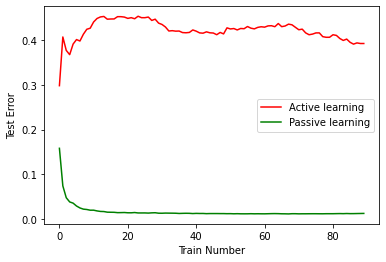

In [365]:
pass_mean = [i/50 for i in passive]
act_mean = [i/50 for i in active]
x_array = np.arange(0,90)
plt.xlabel('Train Number')
plt.ylabel('Test Error')
plt.plot(x_array, act_mean, 'red', label="Active learning")
plt.plot(x_array, pass_mean, 'green', label="Passive learning")
plt.legend()
plt.show()

As the number of training increases, the active learning test error has larger error than passive.

label binariize: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html
kmeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmean min distance: https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn
Spectral Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html